In [1]:
import os
os.chdir('/usr4/cs591/samarthm/projects/synthetic/final/misc_repos/POVID')

import argparse
from llava.model.eval_model.gptscore_model import LLaVA_GPTScoreModel
from llava.model.eval_model.gptscore_model import default_question_template, default_answer_template


model_path = 'checkpoint/sugarcrepe/train_sugarcrepe_lora2'
model_name = 'llava_lora_sugarcrepe'
model_base = 'liuhaotian/llava-v1.5-13b'
model = LLaVA_GPTScoreModel(
        model_path=model_path, 
        model_name=model_name, 
        model_base=model_base,
        device='cuda',)


/projectnb/saenkog/samarth/miniconda3/envs/POVID/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading LLaVA from base model...


/projectnb/saenkog/samarth/miniconda3/envs/POVID/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Loading checkpoint shards:   0%|                                                                                                                                                                               | 0/3 [00:00<?, ?it/s]/projectnb/saenkog/samarth/miniconda3/envs/POVID/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Loading checkpoint 

Loading additional LLaVA weights...
Loading LoRA weights...
Merging LoRA weights...
Model is loaded...


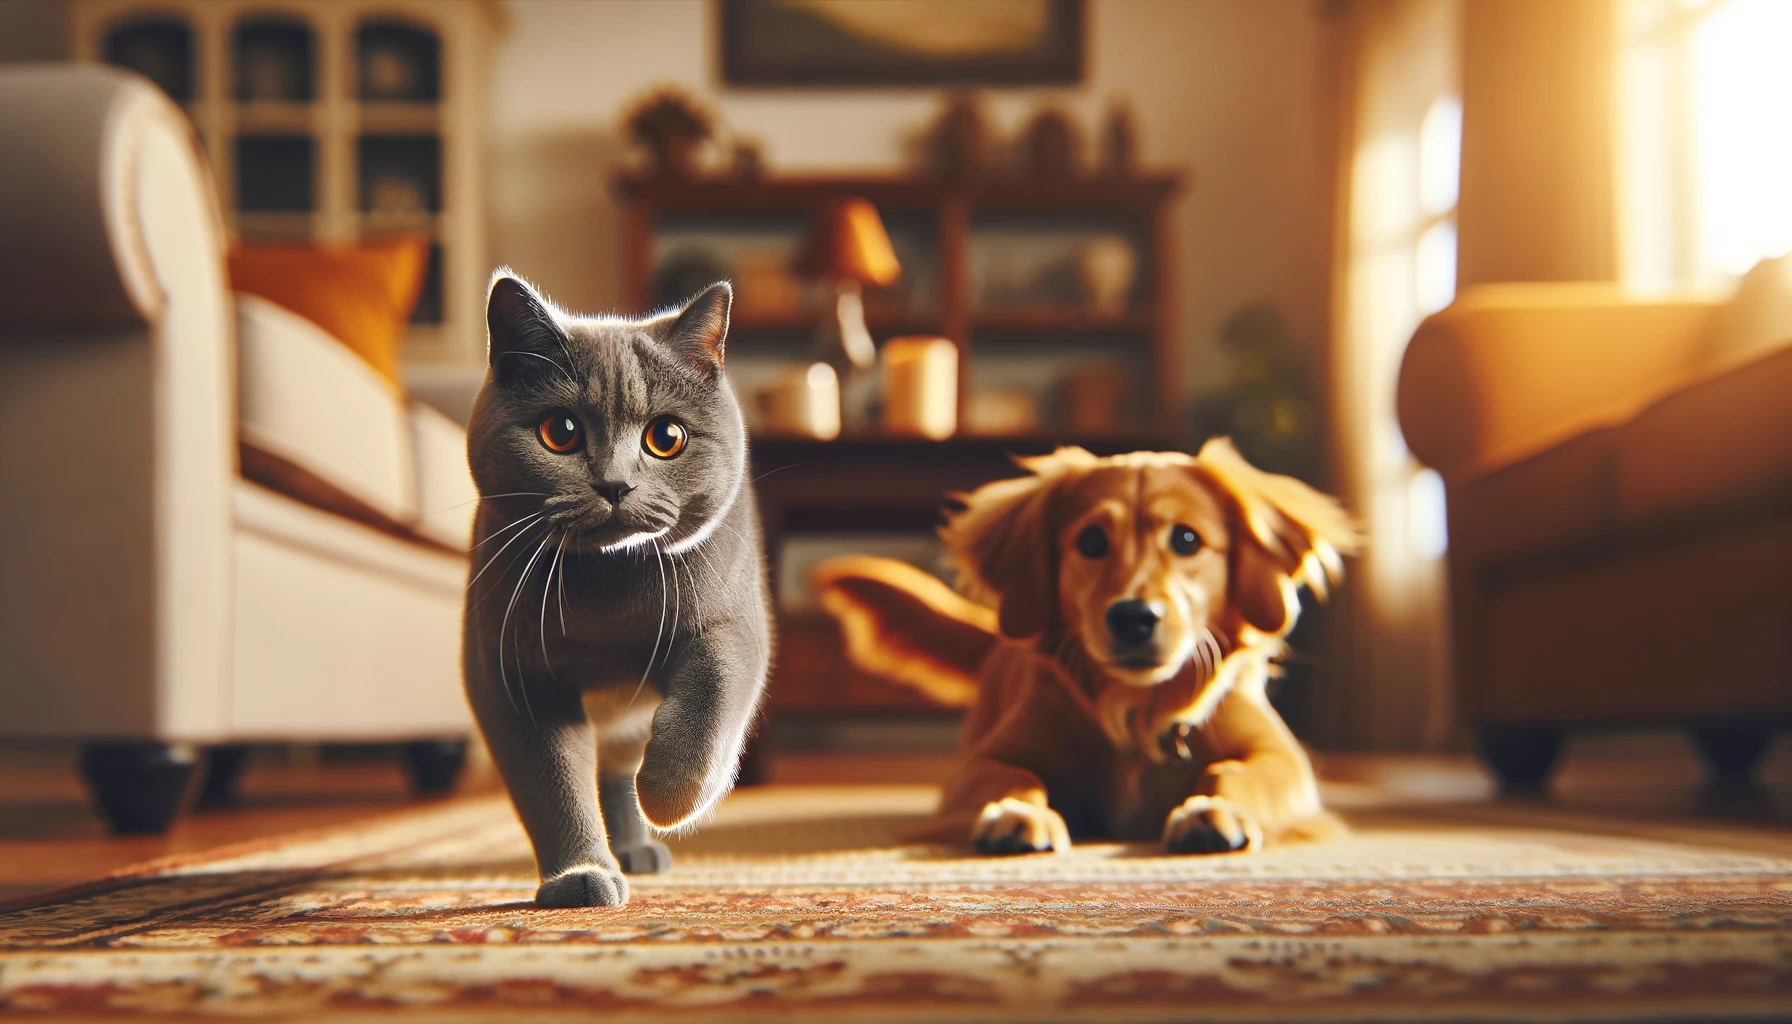

tensor([-15.7631]) tensor([-16.3373])


In [2]:
from PIL import Image
import torch

# img = Image.open('test_images/dalle_dog_chases_cat_1.webp').convert('RGB')
img = Image.open('test_images/dalle_cat_chases_dog_1.webp').convert('RGB')
display(img)
img = model.image_processor.preprocess(img)['pixel_values'][0]
img = torch.Tensor(img).unsqueeze(0).cuda()

score1 = model.forward(
    img, ['a cat chases a dog'], question_template='caption:', 
    answer_template='{}')

score2 = model.forward(
    img, ['a dog chases a cat'], question_template='caption:', 
    answer_template='{}')

print(score1, score2)

In [ ]:
from PIL import Image
import torch

img = Image.open('test_images/dalle_dog_chases_cat_1.webp').convert('RGB')
display(img)
# img = Image.open('test_images/dalle_cat_chases_dog_1.webp').convert('RGB')
img = model.image_processor.preprocess(img)['pixel_values'][0]
img = torch.Tensor(img).unsqueeze(0).to(device=model.model.device, dtype=model.model.dtype)

from llava.mm_utils import tokenizer_image_token
from llava.model.eval_model.gptscore_model import format_question

question = 'Does this image describe "a dog chasing a cat"?'

question = format_question(question)

inputs = tokenizer_image_token(question, model.tokenizer, return_tensors='pt').unsqueeze(0).to(device=model.model.device)
output = model.model.generate(inputs=inputs, images=img, max_new_tokens=1024)

output_text = model.tokenizer.batch_decode(output, skip_special_tokens=True)[0]
output_text = output_text.strip()

print(output_text)
